In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten
from keras.optimizers import RMSprop
from keras.models import Sequential
from keras.datasets import cifar10
from tensorflow.keras.utils import plot_model

## Details of cifar10

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another

In [3]:
(train_images,train_labels),(test_images,test_labels)=cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [4]:
print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [7]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [16]:
epochs=5
batch_size=150
no_classes=10

## Verifying the data

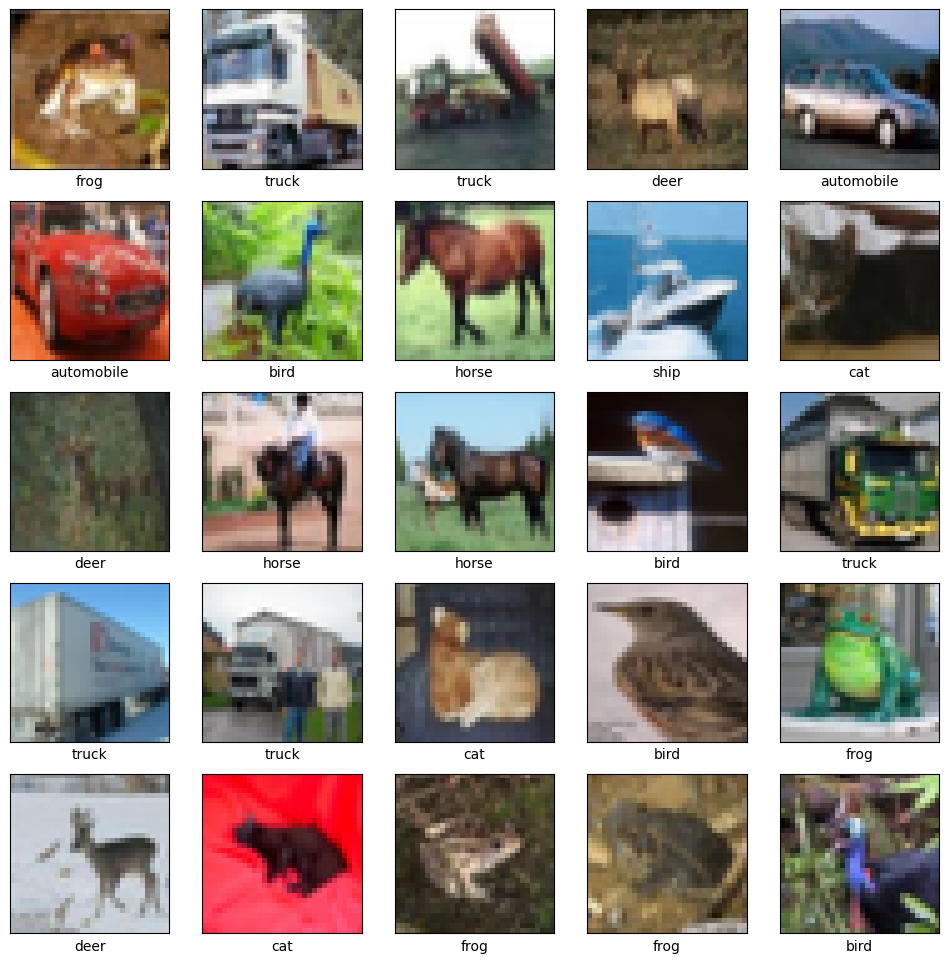

In [11]:
plt.figure(figsize=(12,12))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid()
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()


## Build a Model

In [30]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3,)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(20,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dense(340,activation='relu'))
model.add(Dense(no_classes,activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 20)        5780      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 20)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 720)               0         
                                                                 
 dense_7 (Dense)             (None, 500)              

In [15]:
720*2/3

480.0

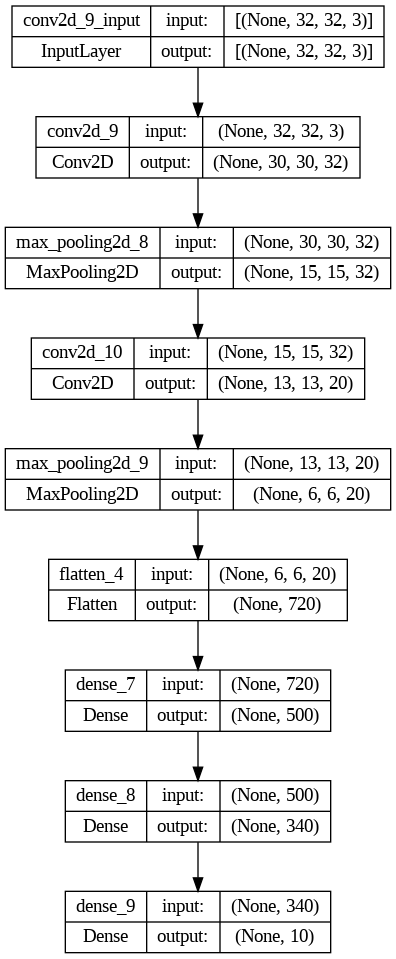

In [31]:
plot_model(model,show_shapes=True)

In [33]:
model.compile(optimizer=RMSprop(),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

## Training & Validation

In [35]:
history= model.fit(train_images,train_labels,epochs=10,batch_size=batch_size,verbose=2,validation_data=(test_images,test_labels))

Epoch 1/10
334/334 - 2s - loss: 0.9036 - accuracy: 0.6849 - val_loss: 1.3385 - val_accuracy: 0.5622 - 2s/epoch - 6ms/step
Epoch 2/10
334/334 - 2s - loss: 0.7661 - accuracy: 0.7337 - val_loss: 1.3323 - val_accuracy: 0.5974 - 2s/epoch - 6ms/step
Epoch 3/10
334/334 - 2s - loss: 0.6613 - accuracy: 0.7715 - val_loss: 1.8708 - val_accuracy: 0.5313 - 2s/epoch - 5ms/step
Epoch 4/10
334/334 - 2s - loss: 0.5582 - accuracy: 0.8062 - val_loss: 1.6196 - val_accuracy: 0.5770 - 2s/epoch - 5ms/step
Epoch 5/10
334/334 - 2s - loss: 0.4779 - accuracy: 0.8366 - val_loss: 1.6566 - val_accuracy: 0.6129 - 2s/epoch - 5ms/step
Epoch 6/10
334/334 - 2s - loss: 0.4059 - accuracy: 0.8606 - val_loss: 1.8288 - val_accuracy: 0.6065 - 2s/epoch - 5ms/step
Epoch 7/10
334/334 - 1s - loss: 0.3620 - accuracy: 0.8791 - val_loss: 2.3319 - val_accuracy: 0.5712 - 1s/epoch - 4ms/step
Epoch 8/10
334/334 - 2s - loss: 0.3217 - accuracy: 0.8936 - val_loss: 2.6504 - val_accuracy: 0.5813 - 2s/epoch - 5ms/step
Epoch 9/10
334/334 - 2s 

In [36]:
score= model.evaluate(test_images,test_labels)
print(score)

313/313 [==============================] - 2s 5ms/step - loss: 2.4984 - accuracy: 0.6069
[2.49839186668396, 0.6068999767303467]


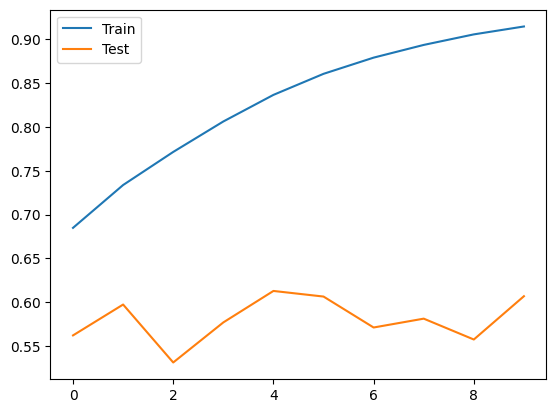

In [37]:
plt.plot(range(10),history.history['accuracy'],label='Train')
plt.plot(range(10),history.history['val_accuracy'],label='Test')
plt.legend()


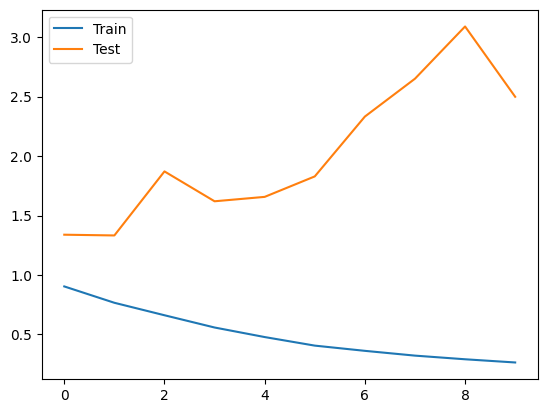

In [38]:
plt.plot(range(10),history.history['loss'],label='Train')
plt.plot(range(10),history.history['val_loss'],label='Test')
plt.legend()

In [39]:
y_pred= model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [43]:
y_pred[0]

array([8.9904133e-05, 2.1945811e-03, 3.0341491e-04, 3.4277445e-01,
       2.1542246e-02, 6.2190384e-01, 1.1458192e-04, 6.5138233e-03,
       4.0065534e-03, 5.5655383e-04], dtype=float32)

In [42]:
test_labels[0]

array([3], dtype=uint8)

In [44]:
test_labels= keras.utils.to_categorical(test_labels)

In [45]:
test_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [46]:
pred=[]
for i in range(len(y_pred)):
  pred.append(np.argmax(y_pred[i]))
print(pred)

[5, 1, 1, 0, 4, 6, 1, 2, 3, 9, 2, 9, 5, 7, 9, 4, 5, 3, 8, 6, 4, 0, 4, 9, 4, 4, 2, 0, 9, 6, 6, 4, 2, 3, 9, 9, 4, 9, 9, 5, 4, 6, 5, 6, 9, 9, 3, 9, 4, 4, 9, 9, 7, 3, 8, 0, 7, 3, 5, 6, 7, 7, 7, 9, 5, 2, 1, 2, 5, 9, 4, 3, 8, 8, 9, 2, 2, 5, 5, 8, 8, 9, 1, 7, 2, 5, 2, 3, 8, 9, 0, 3, 8, 6, 7, 3, 4, 0, 0, 5, 4, 5, 6, 2, 1, 1, 3, 6, 8, 5, 6, 0, 4, 8, 9, 4, 0, 5, 6, 5, 0, 4, 1, 4, 8, 9, 5, 9, 5, 2, 2, 1, 8, 9, 1, 7, 2, 7, 2, 8, 3, 5, 6, 5, 1, 7, 3, 6, 7, 5, 3, 9, 5, 5, 0, 5, 3, 9, 7, 4, 2, 1, 5, 2, 0, 4, 8, 4, 9, 0, 9, 6, 1, 9, 9, 9, 6, 4, 5, 9, 0, 5, 2, 2, 4, 8, 5, 2, 3, 0, 2, 5, 4, 1, 7, 2, 8, 5, 5, 3, 5, 1, 8, 7, 1, 3, 8, 5, 7, 9, 7, 9, 3, 9, 1, 5, 4, 9, 0, 4, 7, 7, 9, 7, 5, 1, 5, 6, 5, 9, 3, 1, 5, 0, 8, 0, 4, 7, 4, 5, 1, 1, 2, 7, 0, 6, 9, 8, 2, 6, 3, 3, 9, 9, 4, 0, 3, 0, 6, 9, 8, 1, 3, 7, 0, 8, 0, 4, 7, 0, 5, 3, 6, 3, 8, 2, 0, 2, 4, 3, 9, 2, 3, 1, 9, 9, 8, 0, 7, 9, 1, 2, 6, 9, 3, 2, 6, 0, 0, 6, 6, 4, 5, 2, 6, 1, 9, 2, 1, 4, 0, 6, 0, 2, 3, 0, 4, 7, 5, 5, 3, 3, 2, 5, 3, 1, 6, 7, 4, 6, 1, 9, 6, 

In [47]:
act=[]
for i in range(len(test_labels)):
  act.append(np.argmax(test_labels[i]))
print(act)

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0, 6, 2, 1, 3, 0, 4, 2, 7, 8, 3, 1, 2, 8, 0, 8, 3, 5, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 9, 6, 5, 6, 3, 8, 7, 6, 2, 5, 2, 8, 9, 6, 0, 0, 5, 2, 9, 5, 4, 2, 1, 6, 6, 8, 4, 8, 4, 5, 0, 9, 9, 9, 8, 9, 9, 3, 7, 5, 0, 0, 5, 2, 2, 3, 8, 6, 3, 4, 0, 5, 8, 0, 1, 7, 2, 8, 8, 7, 8, 5, 1, 8, 7, 1, 3, 0, 5, 7, 9, 7, 4, 5, 9, 8, 0, 7, 9, 8, 2, 7, 6, 9, 4, 3, 9, 6, 4, 7, 6, 5, 1, 5, 8, 8, 0, 4, 0, 5, 5, 1, 1, 8, 9, 0, 3, 1, 9, 2, 2, 5, 3, 9, 9, 4, 0, 3, 0, 0, 9, 8, 1, 5, 7, 0, 8, 2, 4, 7, 0, 2, 3, 6, 3, 8, 5, 0, 3, 4, 3, 9, 0, 6, 1, 0, 9, 1, 0, 7, 9, 1, 2, 6, 9, 3, 4, 6, 0, 0, 6, 6, 6, 3, 2, 6, 1, 8, 2, 1, 6, 8, 6, 8, 0, 4, 0, 7, 7, 5, 5, 3, 5, 2, 3, 4, 1, 7, 5, 4, 6, 1, 9, 3, 

In [48]:
df= pd.DataFrame(pred,columns=['Predicted'])
df['Actual']=act
df

,Predicted,Actual
0,5,3
1,1,8
2,1,8
3,0,0
4,4,6
...,...,...
9995,3,8
9996,3,3
9997,2,5
9998,1,1


In [49]:
accuracy_score(df['Actual'],df['Predicted'])

0.6069

In [50]:
print(classification_report(df['Actual'],df['Predicted']))

              precision    recall  f1-score   support

           0       0.71      0.62      0.66      1000
           1       0.81      0.67      0.73      1000
           2       0.49      0.53      0.51      1000
           3       0.42      0.39      0.40      1000
           4       0.57      0.53      0.55      1000
           5       0.46      0.57      0.51      1000
           6       0.74      0.65      0.69      1000
           7       0.62      0.70      0.66      1000
           8       0.78      0.64      0.71      1000
           9       0.60      0.77      0.67      1000

    accuracy                           0.61     10000
   macro avg       0.62      0.61      0.61     10000
weighted avg       0.62      0.61      0.61     10000

